# Red Neuronal para Predicción de Enfermedades Cardíacas

Este notebook implementa una red neuronal usando TensorFlow/Keras para predecir enfermedades cardíacas basándose en características médicas.

## Importar bibliotecas de TensorFlow
Importamos la biblioteca principal de TensorFlow para el desarrollo de modelos de aprendizaje automático.

In [30]:
import tensorflow as tf

## Importar Keras desde TensorFlow
Importamos Keras, la API de alto nivel de TensorFlow para construir y entrenar redes neuronales.

In [31]:
from tensorflow import keras

## Importar modelo Sequential
Importamos la clase Sequential de Keras, que permite crear modelos secuenciales capa por capa.

In [32]:
from keras.models import Sequential

## Importar capas Dense y NumPy
Importamos la capa Dense (totalmente conectada) para construir la red neuronal y NumPy para manipulación de arrays.

In [33]:
from keras.layers import Dense
import numpy

## Construir la arquitectura de la red neuronal
Creamos un modelo secuencial con:
- Capa de entrada: 11 características de entrada, 20 neuronas con activación ReLU
- Dos capas ocultas: 20 neuronas cada una con activación ReLU
- Capa de salida: 1 neurona con activación sigmoid para clasificación binaria

In [34]:
model = keras.Sequential()
model.add(Dense(20, input_dim=11, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,101 (4.30 KB)

 Trainable params: 1,101 (4.30 KB)

 Non-trainable params: 0 (0.00 B)

## Suprimir advertencias
Configuramos el filtro de advertencias para ignorar mensajes de advertencia durante la ejecución.

In [35]:
import warnings
warnings.filterwarnings('ignore')

## Establecer semilla aleatoria
Fijamos la semilla del generador de números aleatorios para garantizar reproducibilidad de los resultados.

In [36]:
numpy.random.seed(7)

## Cargar dataset de entrenamiento
Cargamos el archivo CSV con los datos de entrenamiento de pacientes cardíacos.

In [37]:
dataset1 = numpy.loadtxt("heartE.csv", delimiter=",")

## Separar características y etiquetas de entrenamiento
Dividimos los datos en:
- X: las primeras 11 columnas (características médicas)
- Y: la última columna (diagnóstico: 0=sano, 1=enfermedad cardíaca)

In [38]:
X = dataset1[:, 0:11]
Y = dataset1[:,11]

## Mostrar características de entrenamiento
Visualizamos las características médicas de los pacientes del conjunto de entrenamiento.

In [39]:
print(X)

[[54.   0.   1.  ...  0.   0.   1. ]
 [42.   1.   2.  ...  1.   1.5  2. ]
 [38.   1.   2.  ...  0.   0.   1. ]
 ...
 [68.   1.   0.  ...  0.   3.4  2. ]
 [57.   1.   0.  ...  1.   1.2  2. ]
 [57.   0.   1.  ...  0.   0.   2. ]]


## Mostrar etiquetas de entrenamiento
Visualizamos los diagnósticos correspondientes a cada paciente del conjunto de entrenamiento.

In [40]:
print(Y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

## Cargar dataset de validación
Cargamos el archivo CSV con los datos de validación para probar el modelo entrenado.

In [41]:
dataset2 = numpy.loadtxt("heartV.csv", delimiter=",")

## Separar características y etiquetas de validación
Dividimos los datos de validación en:
- W: características médicas para prueba
- Z: diagnósticos reales para comparar con las predicciones

In [42]:
W = dataset2[:, 0:11]
Z = dataset2[:,11]

## Mostrar características de validación
Visualizamos las características médicas de los pacientes del conjunto de validación.

In [43]:
print(W)

[[40.  1.  1. ...  0.  0.  1.]
 [37.  1.  1. ...  0.  0.  1.]
 [54.  1.  2. ...  0.  0.  1.]
 ...
 [47.  1.  2. ...  1.  1.  2.]
 [52.  1.  0. ...  1.  1.  2.]
 [54.  1.  0. ...  1.  1.  2.]]


## Mostrar etiquetas de validación
Visualizamos los diagnósticos reales de los pacientes del conjunto de validación.

In [44]:
print(Z)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Compilar el modelo
Configuramos el modelo con:
- Función de pérdida: binary_crossentropy (para clasificación binaria)
- Optimizador: adam (algoritmo de optimización adaptativo)
- Métrica: accuracy (precisión del modelo)

In [45]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

## Entrenar el modelo
Entrenamos la red neuronal durante 500 épocas con un tamaño de lote de 10 muestras por iteración.

In [46]:
model.fit(X, Y, epochs=500, batch_size=10)

Epoch 1/500
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5725 - loss: 3.8097
Epoch 2/500
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5725 - loss: 3.8097
Epoch 2/500
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6746 - loss: 0.6385
Epoch 3/500
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6746 - loss: 0.6385
Epoch 3/500
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6313 - loss: 0.7035
Epoch 4/500
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6313 - loss: 0.7035
Epoch 4/500
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6849 - loss: 0.7233
Epoch 5/500
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6849 - loss: 0.7233
Epoch 5/500
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7182 - loss: 0.6813
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7182 - loss: 0.6813
Epoch 6/500
Epoch 6/500
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6892 - loss: 0.6478
Epoch 7/500
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - 

## Evaluar el modelo
Evaluamos el rendimiento del modelo entrenado en el conjunto de validación y mostramos la precisión obtenida.

In [47]:
test_loss, test_acc = model.evaluate(W, Z)
print("Precision del test: ", test_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6997 - loss: 757.4540  
Precision del test:  0.47826087474823
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6997 - loss: 757.4540
Precision del test:  0.47826087474823


## Generar predicciones
Utilizamos el modelo entrenado para predecir diagnósticos en el conjunto de validación y mostramos las características de entrada.

In [48]:
predictions = model.predict(W)
print(W)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[40.  1.  1. ...  0.  0.  1.]
 [37.  1.  1. ...  0.  0.  1.]
 [54.  1.  2. ...  0.  0.  1.]
 ...
 [47.  1.  2. ...  1.  1.  2.]
 [52.  1.  0. ...  1.  1.  2.]
 [54.  1.  0. ...  1.  1.  2.]]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[40.  1.  1. ...  0.  0.  1.]
 [37.  1.  1. ...  0.  0.  1.]
 [54.  1.  2. ...  0.  0.  1.]
 ...
 [47.  1.  2. ...  1.  1.  2.]
 [52.  1.  0. ...  1.  1.  2.]
 [54.  1.  0. ...  1.  1.  2.]]


## Mostrar predicciones brutas
Visualizamos las predicciones del modelo como probabilidades (valores entre 0 y 1).

In [49]:
print(predictions)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.

## Convertir predicciones a clases binarias
Redondeamos las probabilidades a valores binarios (0 o 1) para obtener las clases predichas.

In [50]:
rounded = [round(x[0]) for x in predictions]
print(rounded)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


## Importar métricas de evaluación
Importamos las herramientas de sklearn para evaluar el rendimiento del modelo de clasificación.

In [51]:
from sklearn import metrics

## Crear matriz de confusión
Calculamos la matriz de confusión comparando las predicciones del modelo con los diagnósticos reales.

In [52]:
confusion_matrix = metrics.confusion_matrix(Z, rounded)

## Preparar visualización de la matriz de confusión
Creamos un objeto para visualizar la matriz de confusión con etiquetas descriptivas (Falso=sano, Verdadero=enfermo).

In [53]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

## Importar biblioteca de visualización
Importamos matplotlib para crear y mostrar gráficos.

In [54]:
import matplotlib.pyplot as plt

## Visualizar matriz de confusión
Mostramos la matriz de confusión como un gráfico para evaluar visualmente el rendimiento del modelo:
- Verdaderos positivos: pacientes enfermos correctamente identificados
- Verdaderos negativos: pacientes sanos correctamente identificados  
- Falsos positivos: pacientes sanos incorrectamente clasificados como enfermos
- Falsos negativos: pacientes enfermos incorrectamente clasificados como sanos

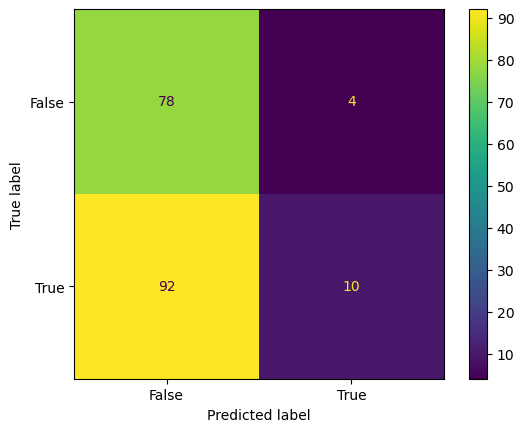

In [55]:
cm_display.plot()
plt.show()